# Análise de dados - Titanic 

## História

No início do século 20 o Titanic zarpou do porto de Southampton com destino a Nova York com cerca de 892 tripulantes e 2435 passageiros. No trejeto o navio ainda passou pelos portos de Cherbourg-Octeville na França e Queenstown na Irlanda. 

O navio não chegou ao seu destino em virtude de uma colisão com um iceberg no dia 14 de abril e acabou afundando no dia seguinte com mais de 1500 pessoas a bordo. 


## Fonte

Nesta análise será utilizado a fonte de dados *train.csv* do site [Kaggle](https://www.kaggle.com/c/titanic/data) que contém um conjunto de dados dos passageiros do Titanic.

## Questionamentos 

As perguntas propostas são: 
- Quantas crianças haviam no navio?  
- Quantas adultos haviam no navio?   
- Quantas idosos haviam no navio?   
- Qual a quantidade de homens e mulheres no navio?  
- Quantas crianças sobreviveram e quantas morreram no acidente?  
- Quantos passageiros sobreviveram no acidente?  
- Sobreviveu mais homens ou mulheres?   
- Qual foi o número de sobreviventes por faixa etaria?   
- Qual a idade do sobrevivente mais novo?   
- Qual a idade do sobrevivente mais idoso?  
- Qual a idade média dos homens que estavam no návio?  
- Qual a idade média das mulheres que estavam no návio?  
- Qual a idade da vitima mais nova?  
- Qual a idade da vitima mais idosa?   
- Qual a classe em que se encontra o maior número de sobreviventes no návio?   
- A idade interferiu no fator sobrevivência?   
- Os passageiros com maior volume de parentes teve menos sobreviventes?   
- Qual a quantidade de sobreviventes por local de embarque e classe do návio?  
- Qual o custo médio do ticket por porto e classe?     
- Quantos passageiros embarcaram por porto e classe? 
- Qual a média de valor pago por faixa etária?

In [145]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [146]:
df = pd.read_csv ('data/all/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Limpeza e preenchimento das informações faltantes

Após os dados serem carregados para o DataFrame será feita a limpeza das informações que não serão uteis para as análises aqui propostas. E o preenchimento das informações que serão utilizadas, porém, estão com informações faltantes.

In [147]:
df.drop(['Cabin'], axis=1, inplace=True)

Valido se no DataFrame há informações repeditas.

In [148]:
df.duplicated().sum()

0

Como não são todas informações de idade que estão preenchidas, atualizo a informação dos registros que não possuem a informação com a média do DataFrame

In [149]:
mean = df['Age'].mean()
df['Age'].fillna(mean, inplace=True)
df['Embarked'].fillna('N/A', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


## Métodos 

Foram criados dois métodos para a análise dos dados com as seguintes finalidades: 
1. return_percentual: calulará e retornará o percentual de acordo com os valores passados evitando repetição de código 
2. categorie_age_range: método que retornará em qual faixa etária se encontra o passageiro de acordo com sua idade

In [150]:
# Função utilizada para retornar o percentual de acordo com os parâmetros passados.
def return_percentual (value_counts, count):
    return round((value_counts/count)*100)

In [151]:
def categorie_age_range (age):
    if age <= 12:
        return 'Crianca'
    elif age > 12 and age < 61:
        return 'Adulto'
    else:
        return 'Idoso'

## Análise dos dados 

Abaixo é criado uma nova coluna no DataFrame informando qual a faixa etária dos passageiros.

In [152]:
df['Age_Range'] = df['Age'].apply(categorie_age_range)

Conforme apresentado abaixo o maior volume de passageiros era composto por adultos e uma minoria estavam entre crianças e idosos. 

In [153]:
df['Age_Range'].value_counts()

Adulto     800
Crianca     69
Idoso       22
Name: Age_Range, dtype: int64

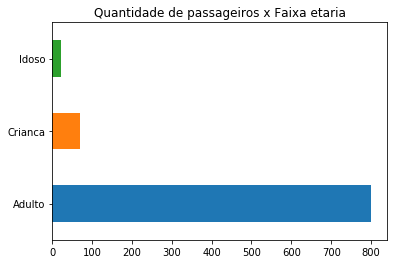

In [154]:
df['Age_Range'].value_counts().plot(kind='barh', title='Quantidade de passageiros x Faixa etaria')

O maior número dos passageiros eram homens e a minoria era formada por mulheres no navio, conforme apresenta os dados abaixo:

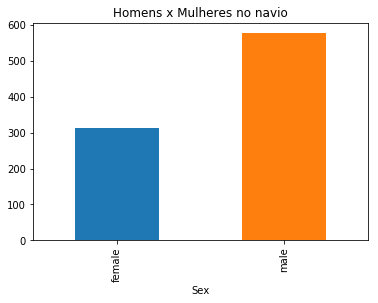

In [155]:
df.groupby(['Sex'])['PassengerId'].count().plot(title='Homens x Mulheres no navio', kind='bar')

In [156]:
age_range_survived = return_percentual(df[df['Age_Range']=='Crianca']['Survived'].value_counts(), 
                                       df[df['Age_Range']=='Crianca']['Survived'].count())
age_range_survived

1    58.0
0    42.0
Name: Survived, dtype: float64

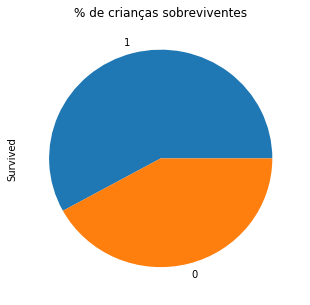

In [157]:
age_range_survived.plot(kind='pie', title='% de crianças sobreviventes', figsize=(5,5))

Os números abaixo mostram que 62% morreram na tragédia e apenas 38% sobreviveram. 

In [158]:
survived = return_percentual (df['Survived'].value_counts(), df['Survived'].count())
survived

0    62.0
1    38.0
Name: Survived, dtype: float64

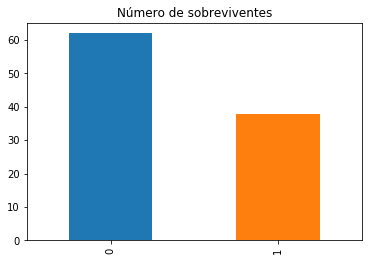

In [159]:
survived.plot(kind='Bar', title='Número de sobreviventes')

Abaixo é criado um DataFrame contendo apenas dados dos passageiros sobreviventes a tragédia. 

In [160]:
df_survived = df[df['Survived'] > 0]
df_survived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    342 non-null int64
Survived       342 non-null int64
Pclass         342 non-null int64
Name           342 non-null object
Sex            342 non-null object
Age            342 non-null float64
SibSp          342 non-null int64
Parch          342 non-null int64
Ticket         342 non-null object
Fare           342 non-null float64
Embarked       342 non-null object
Age_Range      342 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 34.7+ KB


Dos sobreviventes, 68% são mulheres enquanto que homens representam apenas 32%. Para chegar a este resultado, utilizei o DataFrame contendo apenas sobreviventes e calculei o percentual de sobreviventes por sexo.

In [161]:
sex_survived = return_percentual (df_survived['Sex'].value_counts(), df_survived['Sex'].count())
sex_survived

female    68.0
male      32.0
Name: Sex, dtype: float64

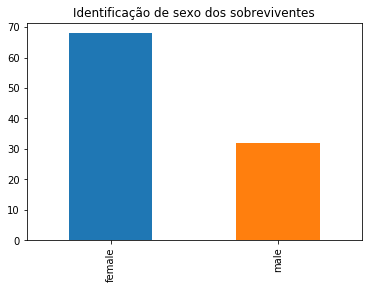

In [162]:
sex_survived.plot(kind='bar', title='Identificação de sexo dos sobreviventes')

Abaixo é apresentado a faixa etaria dos sobreviventes e é possível identificar que o volume de idosos sobreviventes é bem baixo.

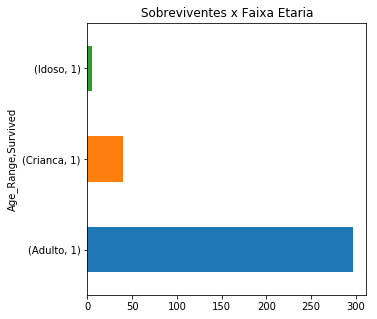

In [163]:
df_survived.groupby(['Age_Range', 'Survived'])['Survived'].count().plot(title='Sobreviventes x Faixa Etaria', 
                                                                        kind='barh', 
                                                                        figsize=(5,5))

Abaixo é respondida o conjunto de perguntas relacionadas a idade dos passageiros: 
- sobrevivente mais novo: 0.42
- sobrevivente mais idosos: 80
- idade média dos homens do návio: 30.51
- idade média das mulheres do návio: 28.22
- idade do sobrevivente mais novo: 1
- idade do sobrevivente mais velho: 74

In [164]:
df_survived['Age'].min()

0.42

In [165]:
df_survived['Age'].max()

80.0

In [166]:
round(df[df['Sex'] == "male"]['Age'].mean(),2)

30.51

In [167]:
round(df[df['Sex'] == "female"]['Age'].mean(),2)

28.22

In [168]:
df[df['Survived'] == 0]['Age'].min()

1.0

In [169]:
df[df['Survived'] == 0]['Age'].max()

74.0

Outro fato da análise dos sobreviventes é que apenas 25% se encontravam no meio do návio e o que o maior volume de sobreviventes estavam na parte de cima (40%) e a outra na parte de baixo do návio (30%), conforme apresenta os dados abaixo:

In [170]:
survived_pclass = return_percentual (df_survived['Pclass'].value_counts(), df_survived['Pclass'].count())
survived_pclass

1    40.0
3    35.0
2    25.0
Name: Pclass, dtype: float64

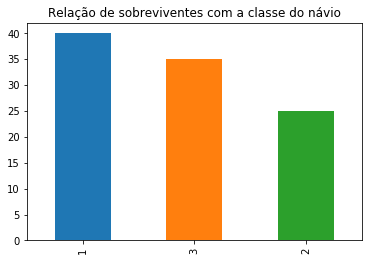

In [171]:
survived_pclass.plot(kind='Bar', title='Relação de sobreviventes com a classe do návio')

Pelo apresentado abaixo, houveram um numero maior de sobreviventes com idade inferior a 30 anos. Pelos dados 64% dos sobreviventes tinham até 30 anos enquanto que acima de 30 anos sobreviveram apenas 36% dos tripulantes. A média de idade dos tripulantes sobreviventes era de 28 anos.

In [172]:
return_percentual (df_survived[df_survived['Age'] > 30].count(), df_survived['Age'].count())[0]

36.0

In [173]:
return_percentual (df_survived[df_survived['Age'] <= 30].count(), df_survived['Age'].count())[0]

64.0

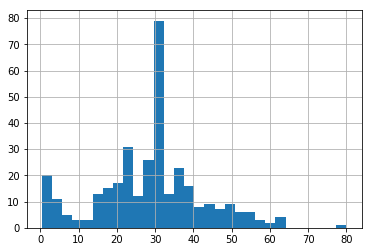

In [174]:
df_survived['Age'].hist(bins=30)

In [175]:
df_survived['Age'].describe()

count    342.000000
mean      28.549778
std       13.772498
min        0.420000
25%       21.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [176]:
df_parents = df.loc[(df['Parch'] > 0) | df['SibSp'] > 0]

Pelos dados apresentados abaixo, teve um maior número de sobreviventes os passageiros que tinham parentes no návio, porém, o resultado apresentado é bem similar, sendo 51% dos sobreviventes possuiam parentes no návio enquanto que 49% tinham parentes e morreram na tragédia.

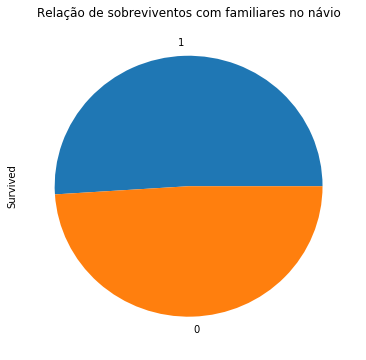

In [177]:
survived_with_parents = return_percentual (df_parents['Survived'].value_counts(), df_parents['Survived'].count())
survived_with_parents.plot(kind='pie', 
                           title='Relação de sobreviventos com familiares no návio', 
                           figsize=(6,6))

Abaixo a distribuição dos sobreviventes por classe do návio e local de embarque

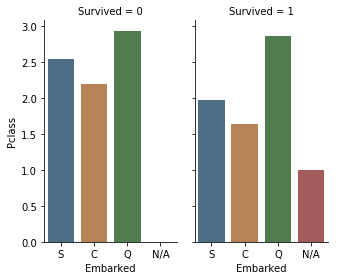

In [178]:
sns.factorplot(x="Embarked", y="Pclass", col="Survived", data=df, saturation=.4, kind="bar", ci=None, aspect=.6)

Abaixo é apresentado a distribuição do preço médio pago pelos passageiros de acordo com o porto e a classe dos mesmos. 

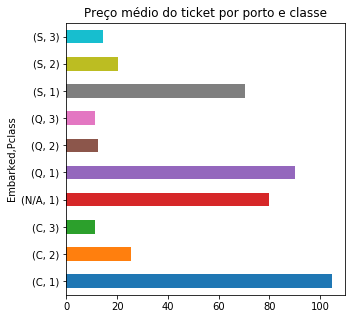

In [179]:
df.groupby(['Embarked', 'Pclass'])['Fare'].mean().plot(kind='barh', 
                                                       title='Preço médio do ticket por porto e classe', 
                                                       figsize=(5,5))

Abaixo é apresentado a quantidade de passageiros de acordo com o porto dos mesmos. 

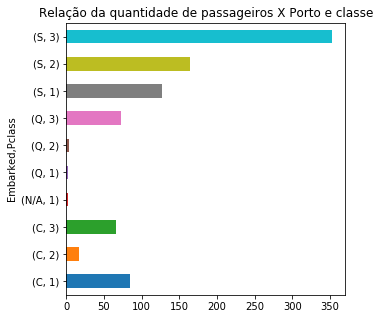

In [180]:
df.groupby(['Embarked', 'Pclass'])['Fare'].count().plot(kind='barh', 
                                                        title='Relação da quantidade de passageiros X Porto e classe', 
                                                        figsize=(5,5))

Abaixo é apresentado o preço médio pago de acordo com a faixa etaria dos passageiros

In [181]:
df.groupby(['Age_Range'])['Fare'].mean()

Age_Range
Adulto     32.009718
Crianca    31.536352
Idoso      41.371214
Name: Fare, dtype: float64

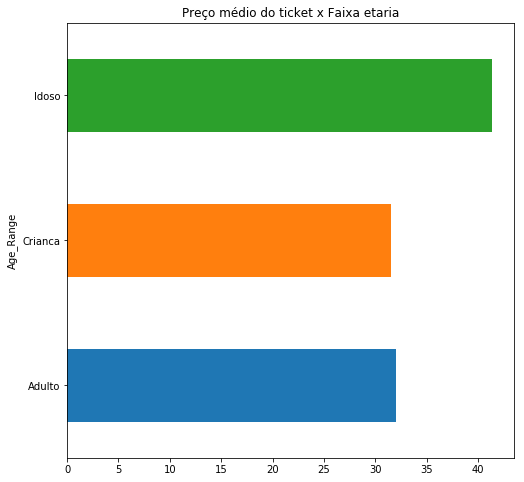

In [182]:
df.groupby(['Age_Range'])['Fare'].mean().plot(kind='barh', 
                                              title='Preço médio do ticket x Faixa etaria',
                                              figsize=(8,8))

## Referencias utilizadas
https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html

http://www.vitormeriat.com.br/2017/03/18/titanic-machine-learning-from-disaster/

https://seaborn.pydata.org/generated/seaborn.catplot.html

http://minerandodados.com.br/index.php/2017/09/26/python-para-analise-de-dados/

## Resultado Final

Para realização das análises acima foram utilizados gráficos de barra, colunas e um histograma com o objetivo de responder aos questionamentos feitos logo no início da análise dos dados aqui mesmo neste notebook.
Todos as análise foram realizadas utilizando o panda DataFrame com o matplotlib e o seaborn para apresentação dos gráficos. 

Os questionamentos feitos no início das análises foram respondidos ao longo das descobertas.


## Limitações 

Foram encontrados alguns valores limitantes por não conter os dados para todos os passageiros, como são os casos dos atributos: 

- Cabin
- Age 
- Embarked

O atributo Cabin foi retirado das análises no momento de data wrangling. Já o atributo Age foi preenchido com a média da idade presente no Data Frame. Com o atributo Embarked foi adicionado uma informação de valor não informado para que pudessemos identificar que para alguns passageiros não foi informado onde o mesmo embarcou.